In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from utils.retrieval import get_table_data

In [2]:
data = get_table_data("temp_saved_songs", "SELECT * FROM temp_saved_songs")
df = pd.DataFrame.from_records(data)
df = df[["main_artist", "featured_artists", "track_name"]]

# Strip whitespace from main_artist
df['main_artist'] = df['main_artist'].str.strip()

# If featured_artists is a list, clean each element
df['featured_artists'] = df['featured_artists'].apply(
    lambda x: [artist.strip() for artist in x] if x is not None else None
)

# Then explode
df_ex = df.explode('featured_artists')

In [3]:
# df_r = df.groupby("main_artist", as_index=False).agg(num_songs=("main_artist", "count"))
# df = df.merge(df_r, on="main_artist")
# df

In [14]:
artist_counts = df['main_artist'].value_counts()
top_artists = artist_counts[artist_counts > 10].index
df_filtered = df[df['main_artist'].isin(top_artists)]

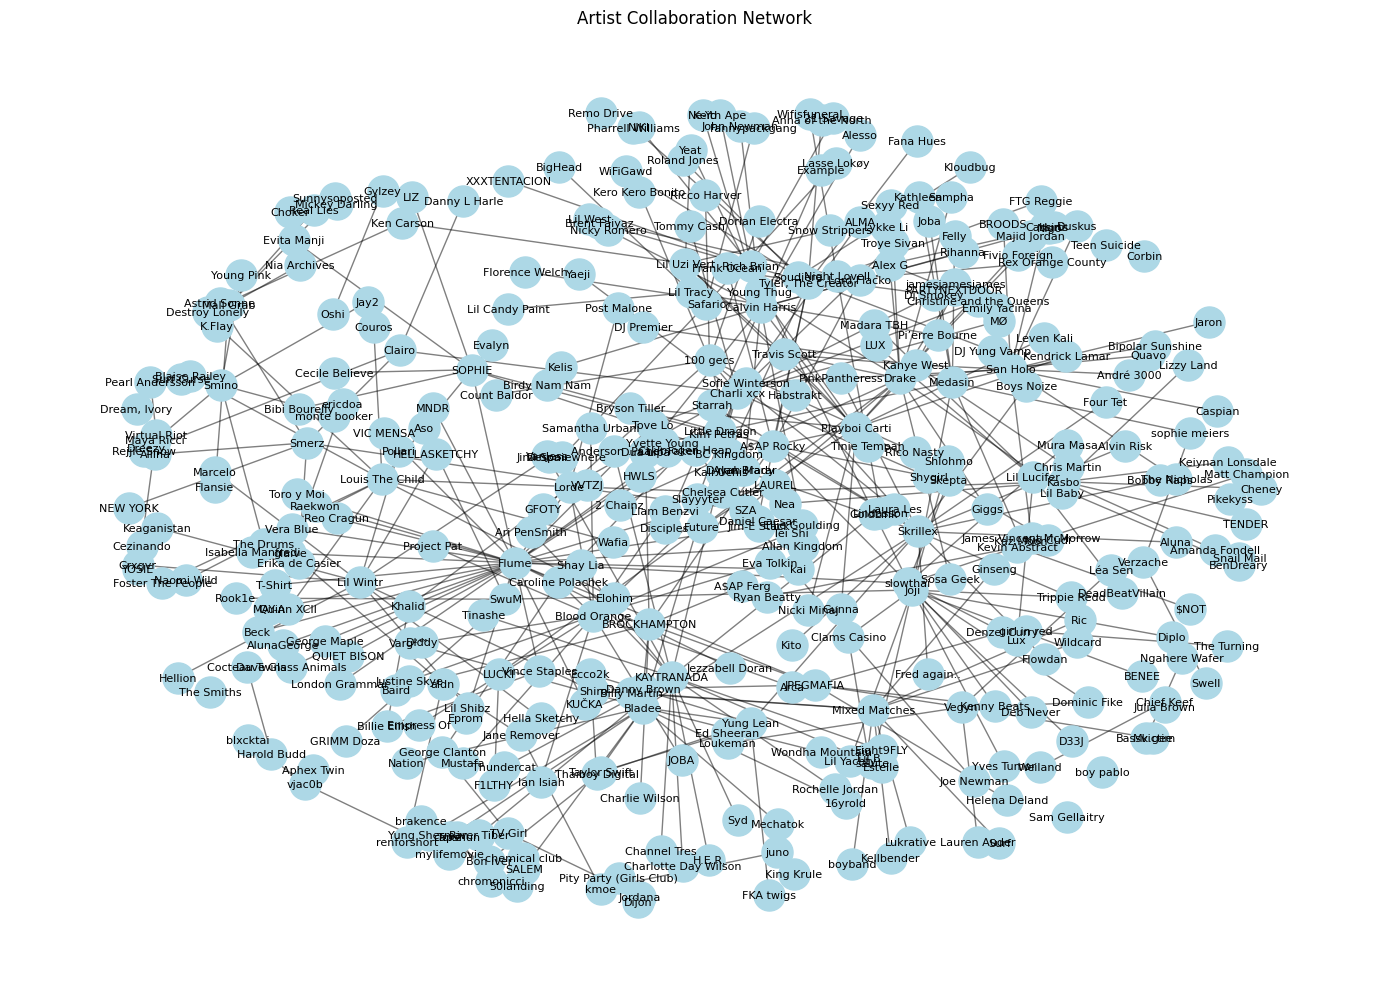

In [15]:
G = nx.Graph()
for idx, row in df_filtered.iterrows():
    main_artist = row['main_artist']
    featured = row['featured_artists']
    G.add_node(main_artist)
    if featured is not None and len(featured) > 0:
        for feat_artist in featured:
            G.add_edge(main_artist, feat_artist)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=.5, iterations=100)  # Position nodes using spring layout
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Artist Collaboration Network")
plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
from pyvis.network import Network

# Create the graph (same as before)
G = nx.Graph()
for idx, row in df_filtered.iterrows():
    main_artist = row['main_artist']
    featured = row['featured_artists']
    G.add_node(main_artist)
    if featured is not None and len(featured) > 0:
        for feat_artist in featured:
            G.add_edge(main_artist, feat_artist)

# Create pyvis network
net = Network(directed=False, height="900px", width="100%", notebook=True, cdn_resources="in_line", bgcolor="#EFEFEB")
net.from_nx(G)

main_artists = set(df_filtered['main_artist'].unique())
for node in net.nodes:
    if node["id"] in main_artists:
        node['color'] = "#2a5949"
    else:
        node['color'] = "#94D1A3"

# Show the interactive visualization
net.show("artist_network.html")

artist_network.html
